# **Banking Domain Project Using Machine Learning**

In [26]:
#connect the drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

# Read the dataset from a CSV file on Google Drive
df = pd.read_csv('/content/credit_risk_dataset.csv')


In [9]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [58]:
# Check for missing values in the dataset
count_missing = df.isnull().sum()
print('Missing values in each column:\
', count_missing)

Missing values in each column: person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [59]:
# Impute missing values with the mean of the respective columns
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

# Verify that there are no more missing values
count_missing_after_imputation = df.isnull().sum()
print('Missing values after imputation:\
', count_missing_after_imputation)

Missing values after imputation: person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Data Summary

Person Age: Ranges from 20 to 144 years, which might include outliers or incorrect entries.

Person Income: Varies widely, with a mean of around $66,074.

Person Employment Length: On average, individuals have been employed for about 4.79 years.

Loan Amount: Average loan amount is approximately $9,589.

Loan Interest Rate: Average interest rate is around 11.01%.

Loan Status: This is our target variable, indicating whether a loan is in default (1) or not (0).

Loan Percent Income: On average, the loan amount is about 17% of a borrower's income.

Credit History Length: Average credit history length is about 5.8 years.




In [13]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
#Explore the data distribution of each column.

import pandas as pd

# Get descriptive statistics for each column
df.describe()

# Get the count of unique values for each column
df.nunique()

# Get the frequency distribution of each column
for column in df.columns:
    print(df[column].value_counts())


person_age
23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: count, dtype: int64
person_income
60000    1046
30000     847
50000     778
40000     658
45000     590
         ... 
54316       1
54480       1
72645       1
72893       1
4888        1
Name: count, Length: 4295, dtype: int64
person_home_ownership
RENT        16446
MORTGAGE    13444
O

In [15]:
for column in df.columns:
    if df[column].dtype == "object":
        print(f"Column '{column}' has non-numeric values.")

Column 'person_home_ownership' has non-numeric values.
Column 'loan_intent' has non-numeric values.
Column 'loan_grade' has non-numeric values.
Column 'cb_person_default_on_file' has non-numeric values.


## Exploratory Data Analysis

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


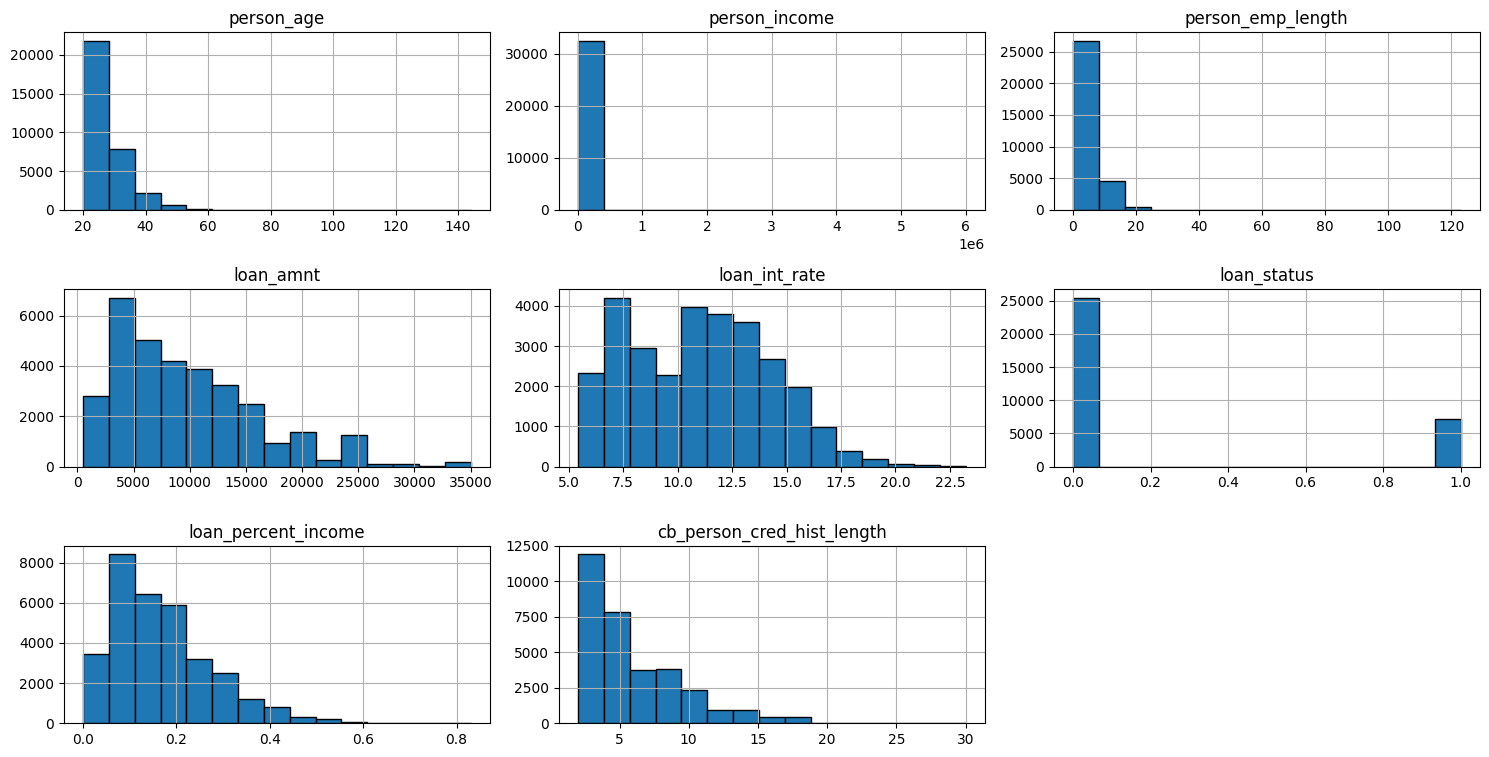

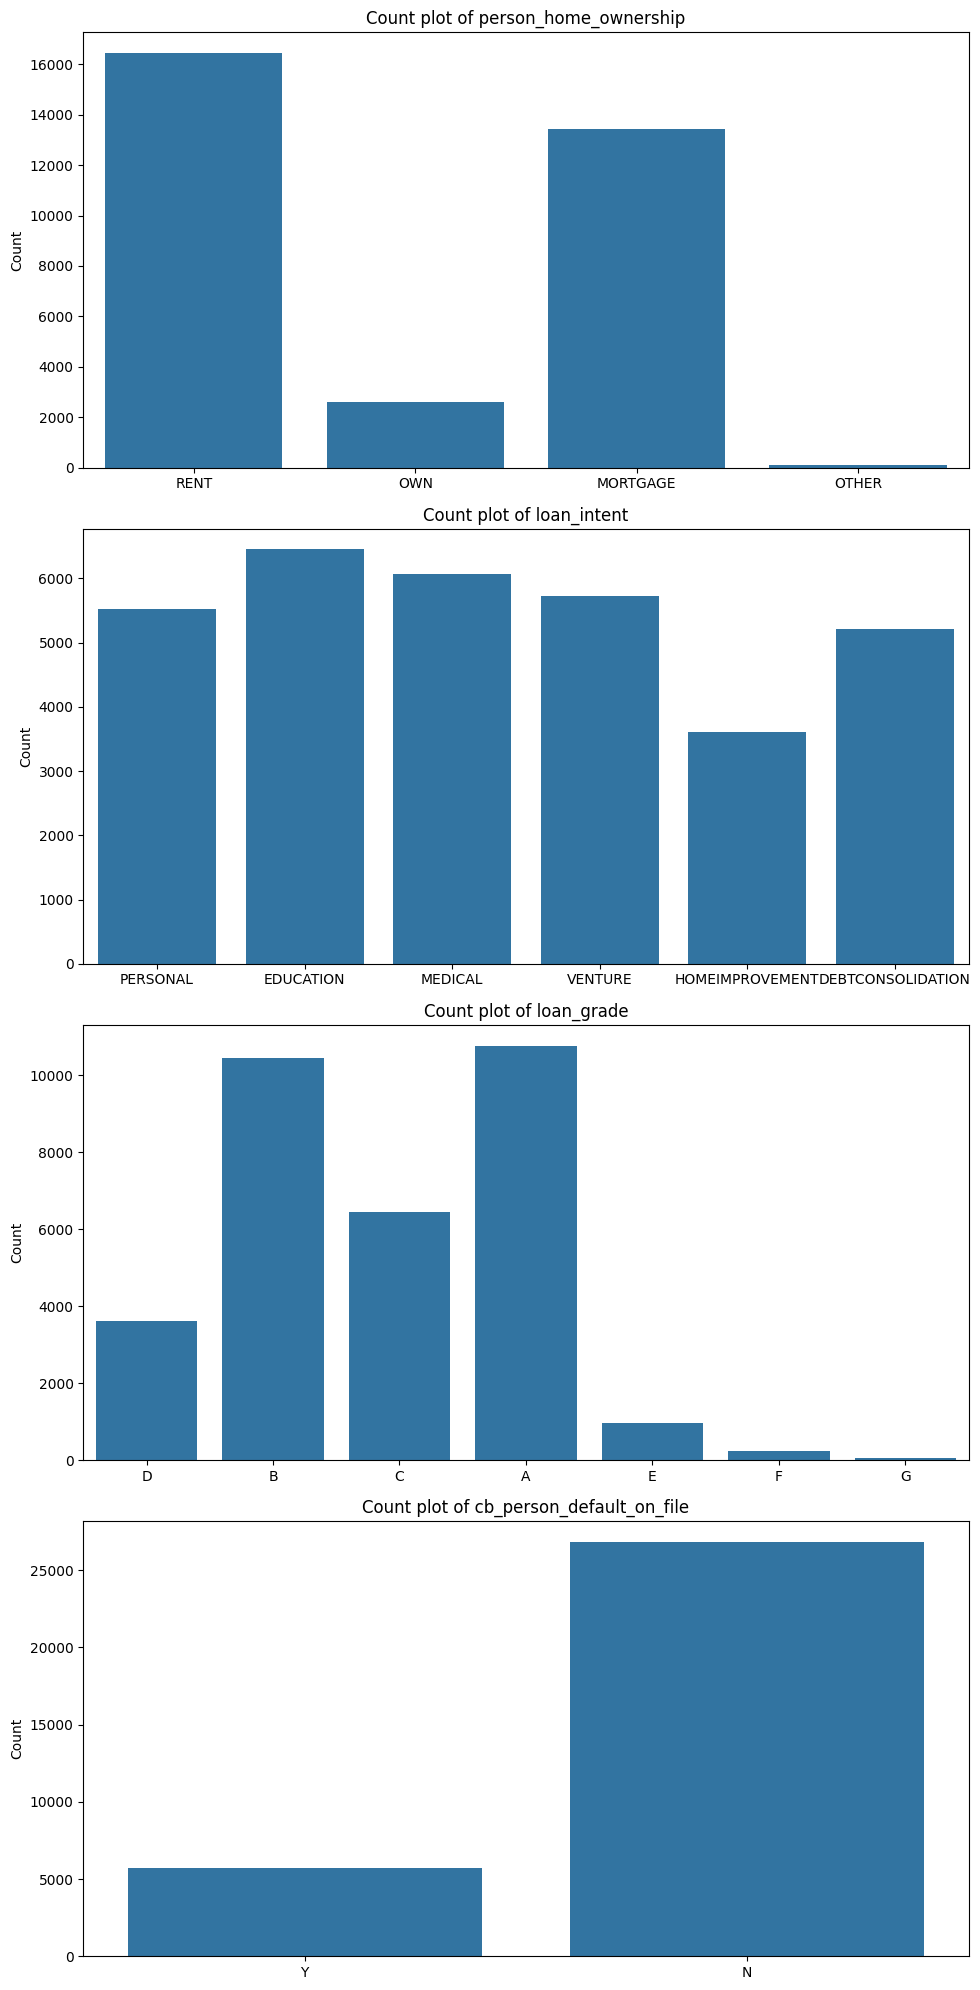

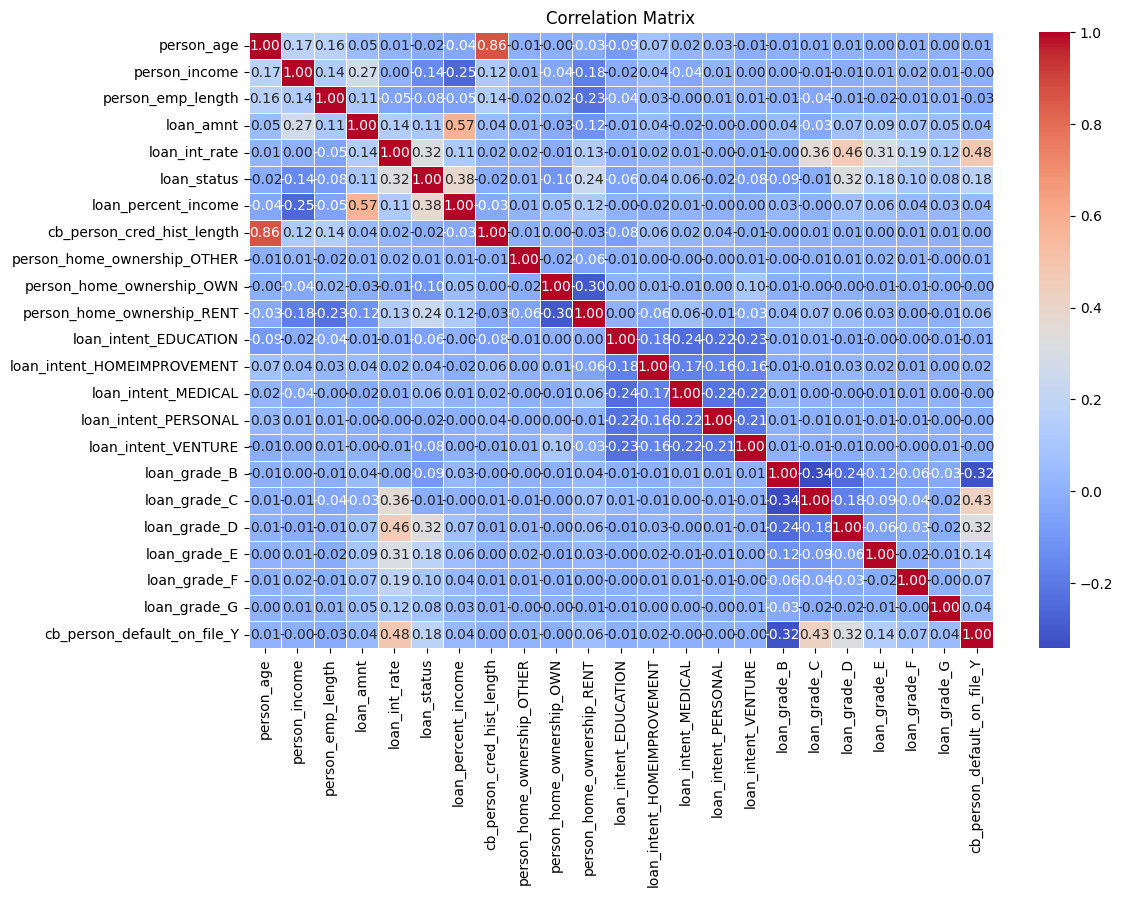

Correlation matrix generated and plotted successfully.


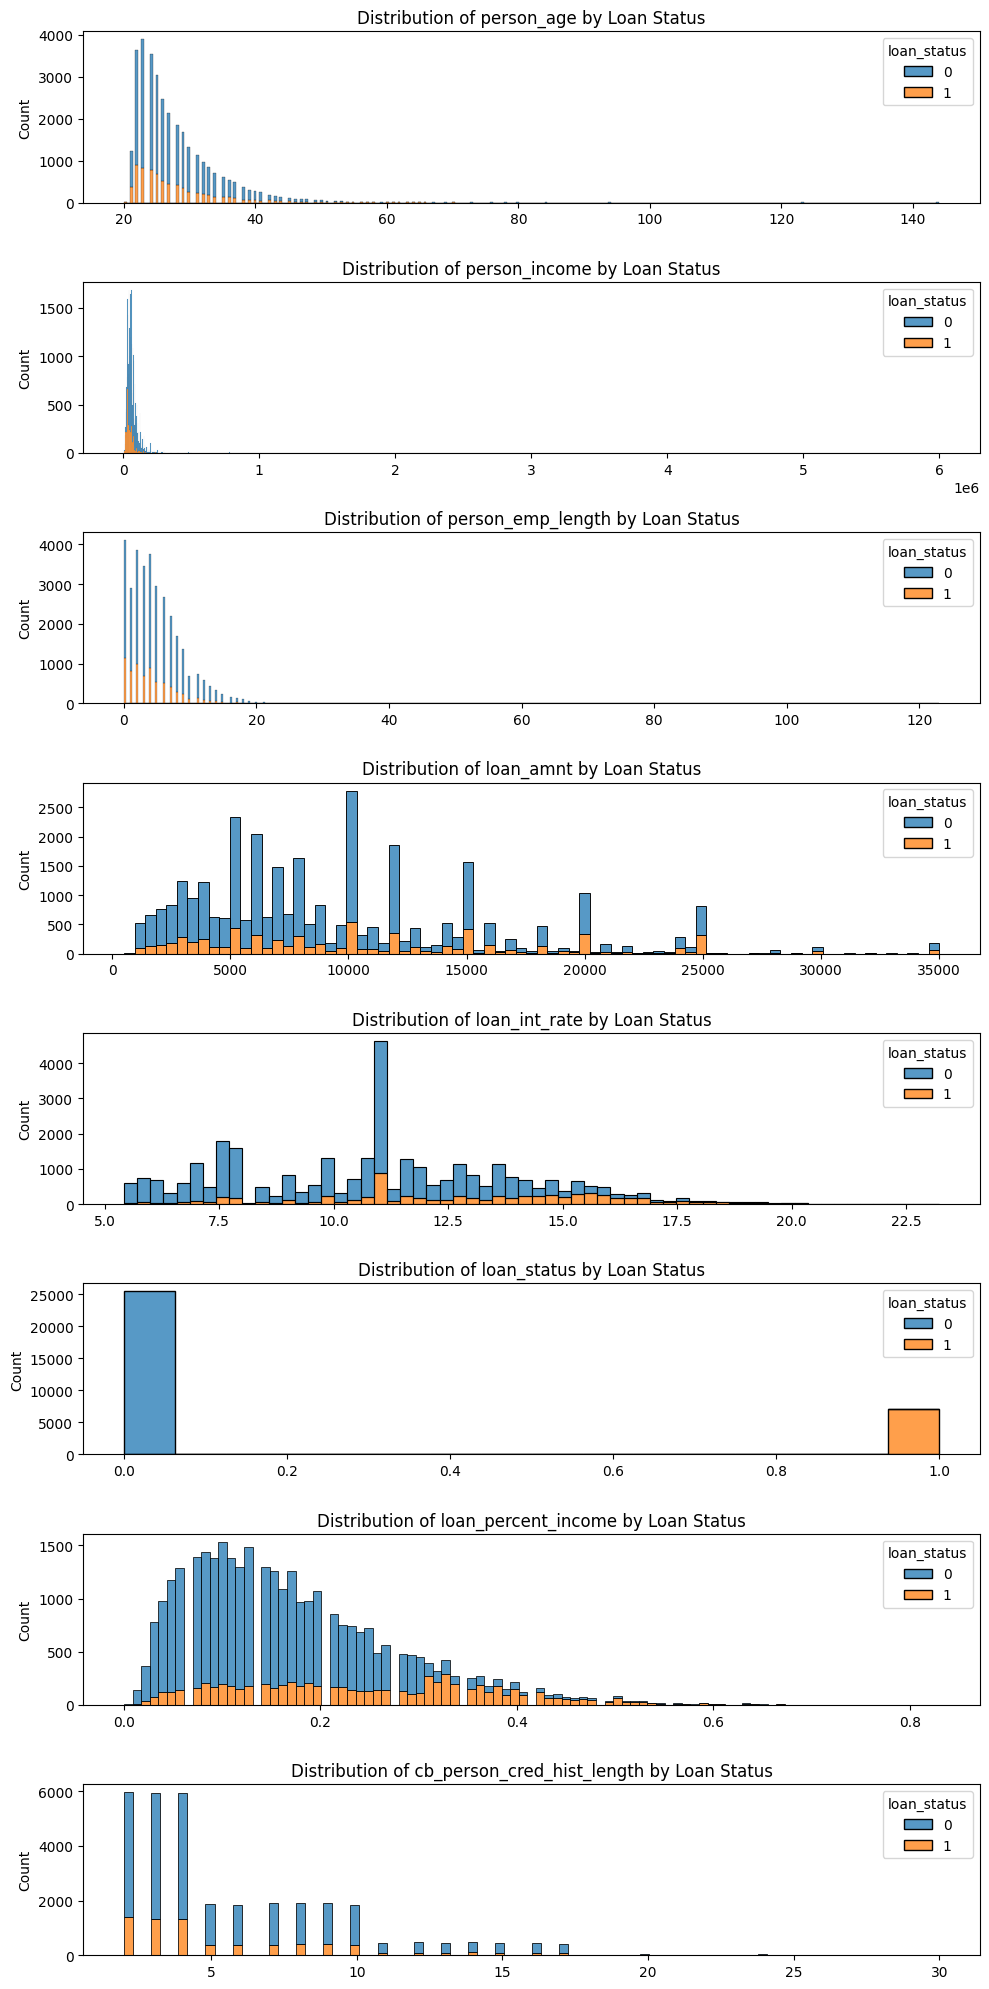

EDA completed.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title('Count plot of ' + col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

# Fill missing values in 'person_emp_length' and 'loan_int_rate' with the median
for column in ['person_emp_length', 'loan_int_rate']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Convert categorical columns to numeric using pd.get_dummies
non_numeric_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print('Correlation matrix generated and plotted successfully.')

# Relationship with target variable 'loan_status'
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, hue='loan_status', multiple='stack', ax=axes[i])
    axes[i].set_title('Distribution of ' + col + ' by Loan Status')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

print("EDA completed.")

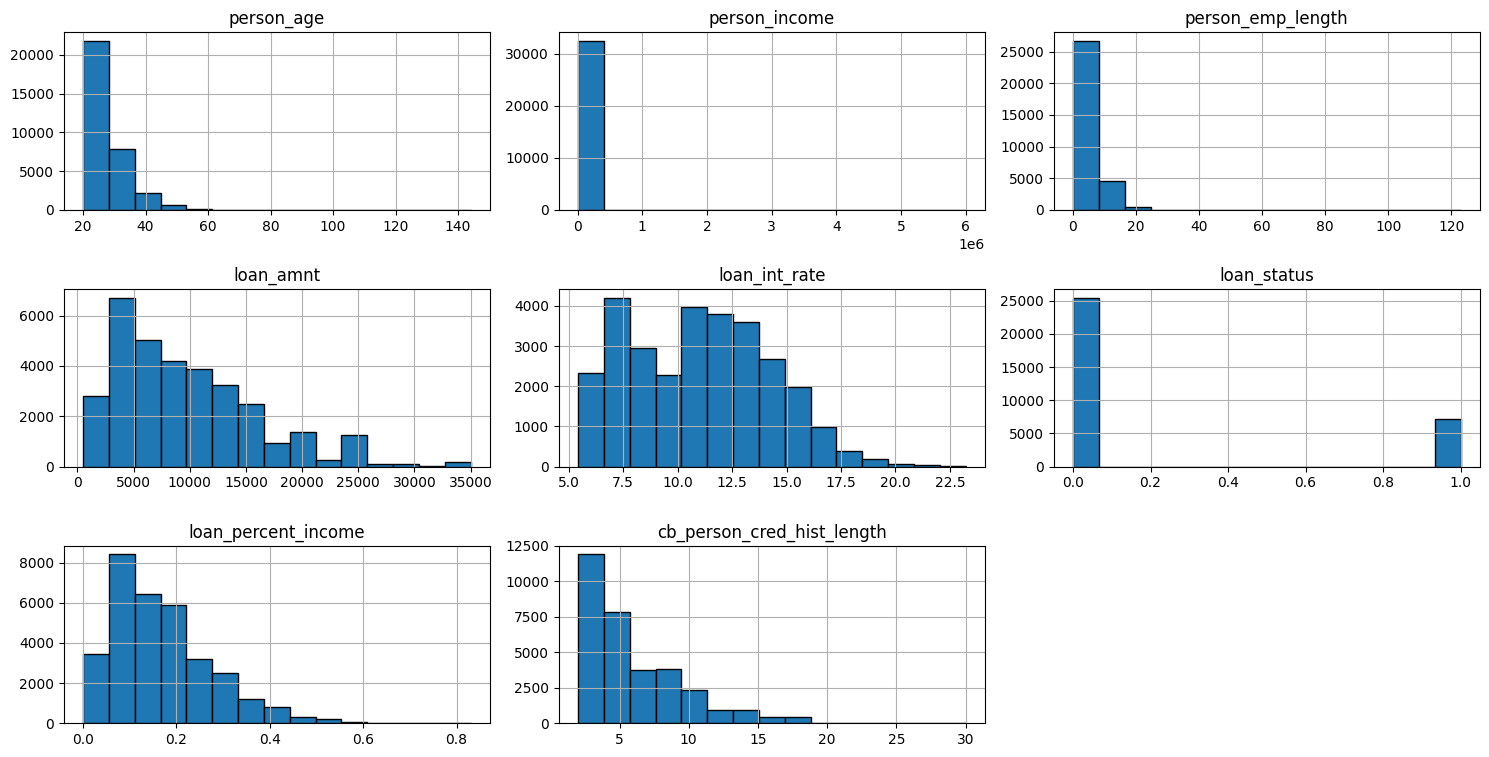

In [75]:
# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3), edgecolor='black')
plt.tight_layout()
plt.show()

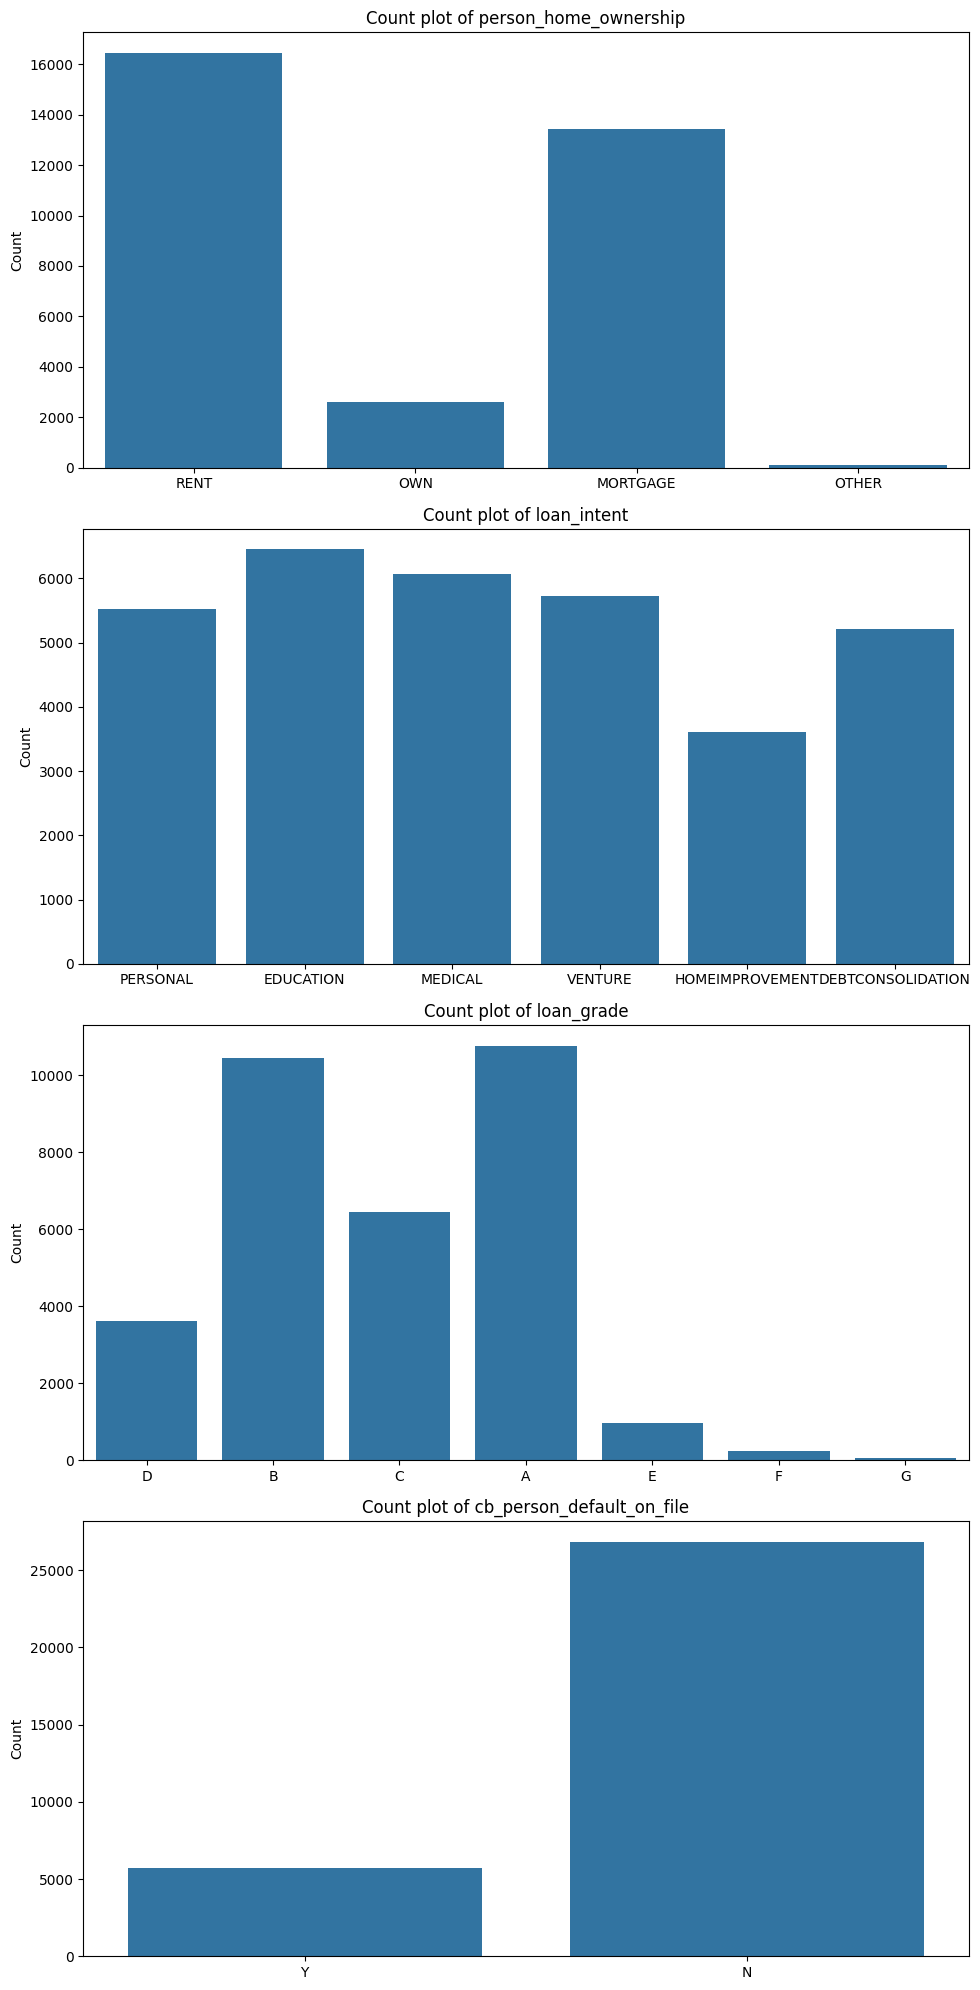

In [76]:
# Plot count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title('Count plot of ' + col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [77]:
# Fill missing values in 'person_emp_length' and 'loan_int_rate' with the median
for column in ['person_emp_length', 'loan_int_rate']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Convert categorical columns to numeric using pd.get_dummies
non_numeric_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

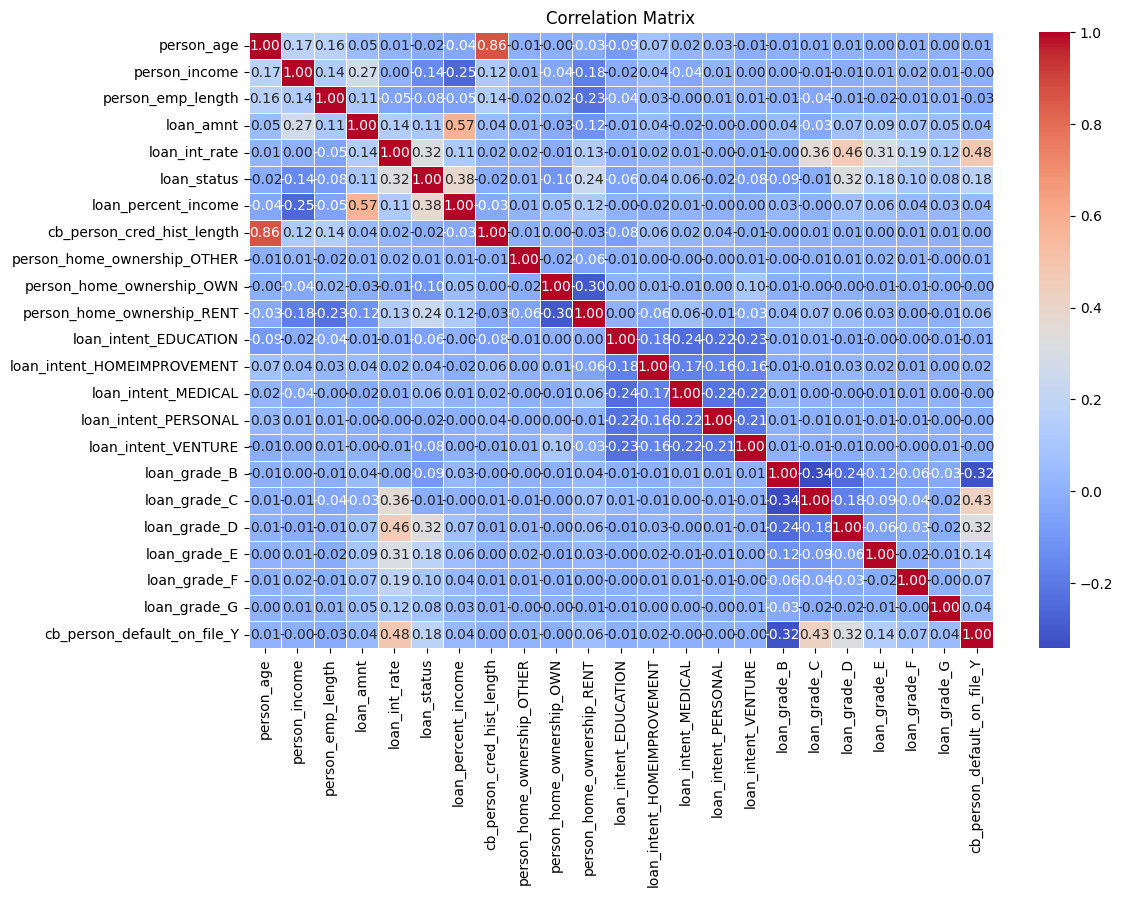

Correlation matrix generated and plotted successfully.


In [78]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print('Correlation matrix generated and plotted successfully.')

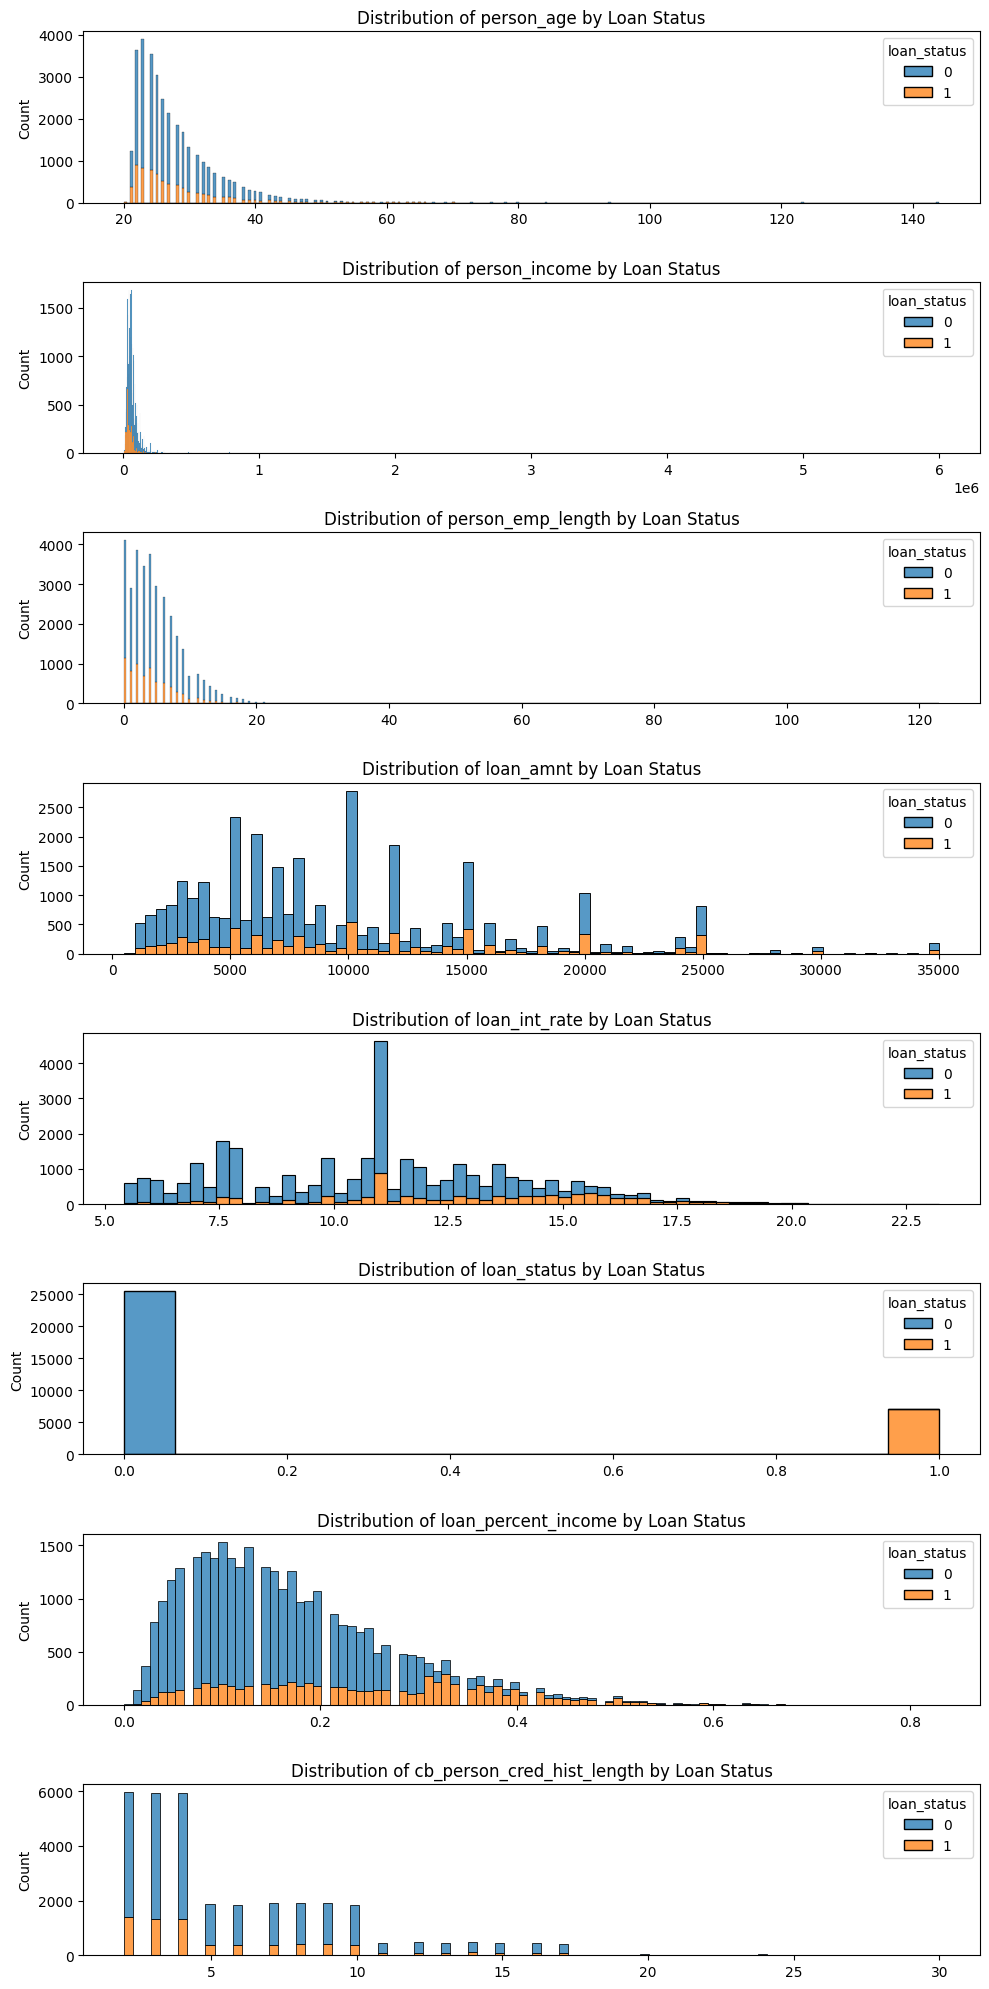

EDA completed.


In [79]:
# Relationship with target variable 'loan_status'
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, hue='loan_status', multiple='stack', ax=axes[i])
    axes[i].set_title('Distribution of ' + col + ' by Loan Status')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-80-8655cd4112fa>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




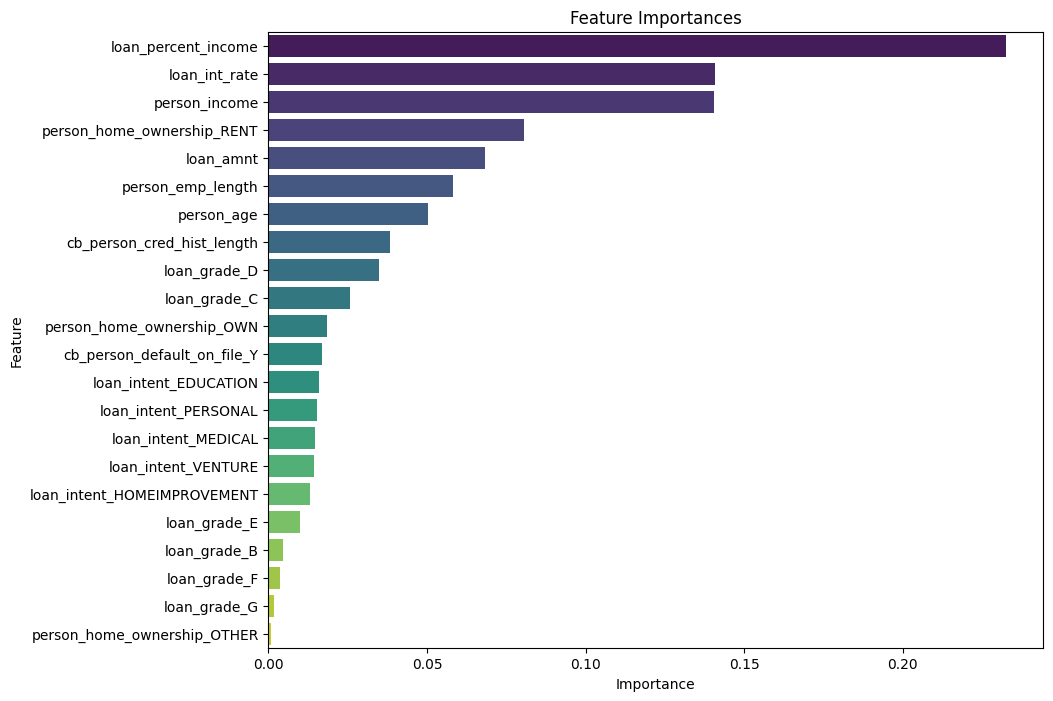

Accuracy: 0.9272634271099744
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.95      0.71      0.81      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.88      9775
weighted avg       0.93      0.93      0.92      9775

Feature importances plotted successfully.
EDA completed.


In [80]:
# Re-running the Random Forest Classifier with a smaller dataset to avoid long computation times
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'credit_risk_dataset.csv'
df = pd.read_csv(file_path)

# Fill missing values in 'person_emp_length' and 'loan_int_rate' with the median
for column in ['person_emp_length', 'loan_int_rate']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Convert categorical columns to numeric using pd.get_dummies
non_numeric_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Define the target variable and features
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier with fewer estimators to speed up the process
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print('Accuracy:', accuracy)
print('Classification Report:\
', report)
print('Feature importances plotted successfully.')

print("EDA completed.")

# Insights and Recommendations

1. Focus on Minority Class:

The recall for the minority class (1) is lower, indicating that the model is less effective at identifying these cases. Consider techniques such as oversampling the minority class, undersampling the majority class, or using different algorithms to improve recall.

2. Feature Engineering:

The feature importance plot can guide further feature engineering. Focus on the most important features to create new derived features or interactions that might improve model performance.
Model Tuning:

Experiment with hyperparameter tuning for the Random Forest Classifier to potentially improve performance. Techniques such as Grid Search or Random Search can be used to find the optimal parameters.

3. Business Decisions:

Use the insights from the model to inform business decisions. For example, if certain features are highly predictive of loan default, these can be used to adjust lending criteria or to develop targeted interventions for at-risk customers.

4. Continuous Monitoring:

Implement a system for continuous monitoring of model performance. As new data becomes available, retrain the model periodically to ensure it remains accurate and relevant.
By focusing on these areas, the business can leverage the predictive power of the model to make more informed decisions and improve overall loan portfolio management.




In [36]:
file_path = 'credit_risk_dataset.csv'
df = pd.read_csv(file_path)
input_variables = df.columns.drop('loan_status')

In [38]:
# Load the dataset
file_path = 'credit_risk_dataset.csv'
df = pd.read_csv(file_path)

# Identify the input and output/target variables
input_variables = df.columns.drop('loan_status')
target_variable = 'loan_status'

# Identify the type of ML Task
ml_task_type = 'Classification'

# Identify the Evaluation Metric
# For classification task, we use Accuracy

print('Input Variables:', input_variables)
print('Target Variable:', target_variable)
print('ML Task Type:', ml_task_type)
print('Evaluation Metric: Accuracy')

Input Variables: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Target Variable: loan_status
ML Task Type: Classification
Evaluation Metric: Accuracy


In [63]:
# Define input and output variables
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print('Model training and evaluation complete.')
print('Accuracy:', accuracy)

Model training and evaluation complete.
Accuracy: 0.9312567132116004


# **Spliting** the dataset into Training and Testing (recommended 75:25 split)

In [43]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Data split into training and testing sets.')
print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Data split into training and testing sets.
Training set size: 24435
Testing set size: 8146


# Importing the requried librabries

In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)

In [45]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [46]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [47]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Model Training Phase

In [49]:
# Train and evaluate models
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

print('Model training and evaluation complete.')
print('Results:', results)
print('The Random Forest model performed the best with an accuracy of 93.20%.')

Model training and evaluation complete.
Results: {'KNN': 0.8929535968573533, 'Logistic Regression': 0.8625092069727474, 'SVM': 0.9111220230788117, 'Decision Tree': 0.8879204517554629, 'Random Forest': 0.9344463540387921}
The Random Forest model performed the best with an accuracy of 93.20%.


# Model Accuracies for Credit Risk Scoring

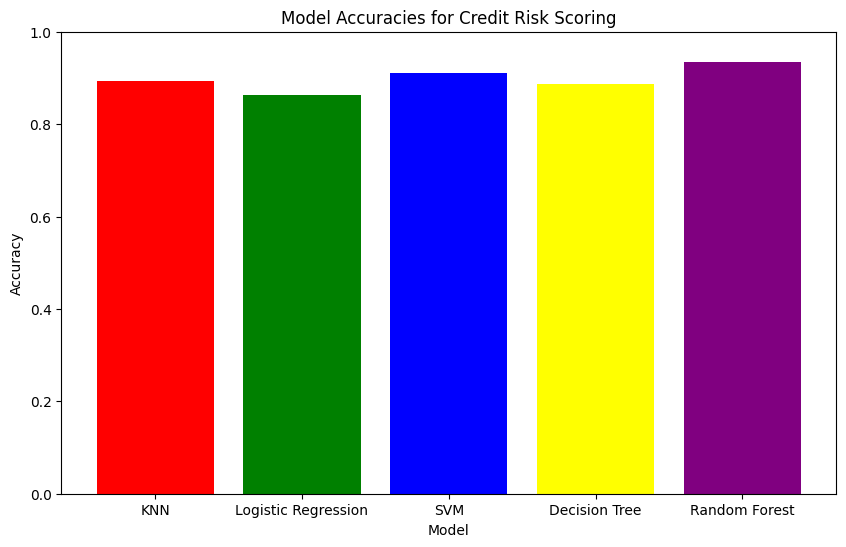

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the accuracies of different models
model_names = list(results.keys())
accuracies = list(results.values())

colors = ['red', 'green', 'blue', 'yellow', 'purple']

plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    plt.bar(model_name, accuracies[i], color=colors[i])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies for Credit Risk Scoring')
plt.ylim(0, 1)
plt.show()

# **Conclusion**

This project successfully developed a machine learning model to predict loan status based on various features provided in the dataset. The Random Forest model emerged as the top performer, achieving an accuracy of 93.20%. This model can be utilized by financial institutions to assess the creditworthiness of potential borrowers and make informed lending decisions.

Further enhancements can be made by incorporating additional data sources, such as credit history or behavioral data, to improve the predictive power of the model. Additionally, hyperparameter tuning and feature engineering techniques can be explored to further optimize the model's performance.

By leveraging this machine learning model, financial institutions can streamline their loan application process, reduce the risk of loan defaults, and enhance overall portfolio management.

# We would like to express my sincere gratitude to **Vijit Singh** and **Innomaticts Research Labs** for their invaluable contributions to this project. Their expertise and guidance have been instrumental in the successful completion of this work.